In [1]:
#installed citipy and seaborn
#! pip install citipy
#! pip install seaborn

In [2]:
#import dependencies

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import requests
import random
import citipy
import seaborn as sns

In [3]:
# openweather api key
api_key = "e5760248211a864fbc4f4418cc6d872d"

In [4]:
#from citipy import citipy

#import cities from citipy
cities = pd.read_csv("https://raw.githubusercontent.com/wingchen/citipy/master/citipy/worldcities.csv")


#take a sample of 500 cities
random_cities = pd.DataFrame(cities.sample(n=550))
random_cities.reset_index(inplace = True)
random_cities


,index,Country,City,Latitude,Longitude
0,43594,us,lexington-fayette,38.049722,-84.458611
1,3727,br,porto real,-22.417200,-44.286100
2,42803,us,clermont,28.549167,-81.773056
3,45740,us,pecan grove,29.625833,-95.731389
4,44404,us,barnstead,43.333889,-71.293333
5,25835,no,flateby,59.833333,11.166667
6,17403,in,chatsu,26.600000,75.950000
7,30124,ph,santo nino,13.701800,121.094900
8,18193,in,kelamangalam,12.600000,77.850000
9,41131,ua,auly,48.527081,34.494931


In [5]:
# openweathermap API
rowcount = 0
random_cities['Temperature'] = ""
random_cities['Humidity'] = ""
random_cities['Cloudiness'] = ""
random_cities['Wind Speed'] = ""


for index, row in random_cities.iterrows():
   
    
    targetCityNumber = row['index']
    targetCity = row['City']
    targetCountry = row['Country']
    targetURL = "http://api.openweathermap.org/data/2.5/weather?q={},{}&units=IMPERIAL&mode=json&APPID={}".format(targetCity, targetCountry, api_key)
    targetURL = targetURL.replace(" ","+")
    
    cityWeather = requests.get(targetURL).json()
    
    try:
        tempF = cityWeather["main"]["temp"]
        humidity = cityWeather["main"]["humidity"]
        cloudiness = cityWeather["clouds"]["all"]
        windspeed = cityWeather["wind"]["speed"]

        random_cities.set_value(index, "Temperature", tempF)
        random_cities.set_value(index, "Humidity", humidity)
        random_cities.set_value(index, "Cloudiness", cloudiness)
        random_cities.set_value(index, "Wind Speed", windspeed)
    except:
        continue

       
    
    rowcount+=1
    
    print("----------------------------")
    print("Retreiving City #: {}".format(rowcount))
    print("City Number: {}".format(targetCityNumber))
    print("City: {}".format(targetCity))
    print("Country: {}".format(targetCountry))
    print(targetURL)
    
randomcitiesDF = pd.DataFrame(random_cities)
randomcitiesDF

----------------------------
Retreiving City #: 1
City Number: 43594
City: lexington-fayette
Country: us
http://api.openweathermap.org/data/2.5/weather?q=lexington-fayette,us&units=IMPERIAL&mode=json&APPID=e5760248211a864fbc4f4418cc6d872d
----------------------------
Retreiving City #: 2
City Number: 3727
City: porto real
Country: br
http://api.openweathermap.org/data/2.5/weather?q=porto+real,br&units=IMPERIAL&mode=json&APPID=e5760248211a864fbc4f4418cc6d872d
----------------------------
Retreiving City #: 3
City Number: 42803
City: clermont
Country: us
http://api.openweathermap.org/data/2.5/weather?q=clermont,us&units=IMPERIAL&mode=json&APPID=e5760248211a864fbc4f4418cc6d872d
----------------------------
Retreiving City #: 4
City Number: 45740
City: pecan grove
Country: us
http://api.openweathermap.org/data/2.5/weather?q=pecan+grove,us&units=IMPERIAL&mode=json&APPID=e5760248211a864fbc4f4418cc6d872d
----------------------------
Retreiving City #: 5
City Number: 44404
City: barnstead
Coun

----------------------------
Retreiving City #: 38
City Number: 27020
City: amadeo
Country: ph
http://api.openweathermap.org/data/2.5/weather?q=amadeo,ph&units=IMPERIAL&mode=json&APPID=e5760248211a864fbc4f4418cc6d872d
----------------------------
Retreiving City #: 39
City Number: 1760
City: sint-truiden
Country: be
http://api.openweathermap.org/data/2.5/weather?q=sint-truiden,be&units=IMPERIAL&mode=json&APPID=e5760248211a864fbc4f4418cc6d872d
----------------------------
Retreiving City #: 40
City Number: 43901
City: holliston
Country: us
http://api.openweathermap.org/data/2.5/weather?q=holliston,us&units=IMPERIAL&mode=json&APPID=e5760248211a864fbc4f4418cc6d872d
----------------------------
Retreiving City #: 41
City Number: 30140
City: san vicente
Country: ph
http://api.openweathermap.org/data/2.5/weather?q=san+vicente,ph&units=IMPERIAL&mode=json&APPID=e5760248211a864fbc4f4418cc6d872d
----------------------------
Retreiving City #: 42
City Number: 19570
City: tasgaon
Country: in
http:

----------------------------
Retreiving City #: 75
City Number: 12142
City: vernouillet
Country: fr
http://api.openweathermap.org/data/2.5/weather?q=vernouillet,fr&units=IMPERIAL&mode=json&APPID=e5760248211a864fbc4f4418cc6d872d
----------------------------
Retreiving City #: 76
City Number: 7973
City: hovezi
Country: cz
http://api.openweathermap.org/data/2.5/weather?q=hovezi,cz&units=IMPERIAL&mode=json&APPID=e5760248211a864fbc4f4418cc6d872d
----------------------------
Retreiving City #: 77
City Number: 36039
City: isetskoye
Country: ru
http://api.openweathermap.org/data/2.5/weather?q=isetskoye,ru&units=IMPERIAL&mode=json&APPID=e5760248211a864fbc4f4418cc6d872d
----------------------------
Retreiving City #: 78
City Number: 36356
City: kirovskiy
Country: ru
http://api.openweathermap.org/data/2.5/weather?q=kirovskiy,ru&units=IMPERIAL&mode=json&APPID=e5760248211a864fbc4f4418cc6d872d
----------------------------
Retreiving City #: 79
City Number: 42010
City: rakai
Country: ug
http://api.op

----------------------------
Retreiving City #: 113
City Number: 24447
City: san julian
Country: mx
http://api.openweathermap.org/data/2.5/weather?q=san+julian,mx&units=IMPERIAL&mode=json&APPID=e5760248211a864fbc4f4418cc6d872d
----------------------------
Retreiving City #: 114
City Number: 45656
City: friendswood
Country: us
http://api.openweathermap.org/data/2.5/weather?q=friendswood,us&units=IMPERIAL&mode=json&APPID=e5760248211a864fbc4f4418cc6d872d
----------------------------
Retreiving City #: 115
City Number: 26080
City: stjordalshalsen
Country: no
http://api.openweathermap.org/data/2.5/weather?q=stjordalshalsen,no&units=IMPERIAL&mode=json&APPID=e5760248211a864fbc4f4418cc6d872d
----------------------------
Retreiving City #: 116
City Number: 45734
City: orange
Country: us
http://api.openweathermap.org/data/2.5/weather?q=orange,us&units=IMPERIAL&mode=json&APPID=e5760248211a864fbc4f4418cc6d872d
----------------------------
Retreiving City #: 117
City Number: 1939
City: dospat
Count

----------------------------
Retreiving City #: 150
City Number: 20102
City: atessa
Country: it
http://api.openweathermap.org/data/2.5/weather?q=atessa,it&units=IMPERIAL&mode=json&APPID=e5760248211a864fbc4f4418cc6d872d
----------------------------
Retreiving City #: 151
City Number: 40715
City: tarsus
Country: tr
http://api.openweathermap.org/data/2.5/weather?q=tarsus,tr&units=IMPERIAL&mode=json&APPID=e5760248211a864fbc4f4418cc6d872d
----------------------------
Retreiving City #: 152
City Number: 41752
City: starokostyantyniv
Country: ua
http://api.openweathermap.org/data/2.5/weather?q=starokostyantyniv,ua&units=IMPERIAL&mode=json&APPID=e5760248211a864fbc4f4418cc6d872d
----------------------------
Retreiving City #: 153
City Number: 38379
City: stolbovaya
Country: ru
http://api.openweathermap.org/data/2.5/weather?q=stolbovaya,ru&units=IMPERIAL&mode=json&APPID=e5760248211a864fbc4f4418cc6d872d
----------------------------
Retreiving City #: 154
City Number: 28205
City: gibgos
Country: p

----------------------------
Retreiving City #: 187
City Number: 40258
City: phuket
Country: th
http://api.openweathermap.org/data/2.5/weather?q=phuket,th&units=IMPERIAL&mode=json&APPID=e5760248211a864fbc4f4418cc6d872d
----------------------------
Retreiving City #: 188
City Number: 4171
City: tucano
Country: br
http://api.openweathermap.org/data/2.5/weather?q=tucano,br&units=IMPERIAL&mode=json&APPID=e5760248211a864fbc4f4418cc6d872d
----------------------------
Retreiving City #: 189
City Number: 38200
City: slantsy
Country: ru
http://api.openweathermap.org/data/2.5/weather?q=slantsy,ru&units=IMPERIAL&mode=json&APPID=e5760248211a864fbc4f4418cc6d872d
----------------------------
Retreiving City #: 190
City Number: 25483
City: boxmeer
Country: nl
http://api.openweathermap.org/data/2.5/weather?q=boxmeer,nl&units=IMPERIAL&mode=json&APPID=e5760248211a864fbc4f4418cc6d872d
----------------------------
Retreiving City #: 191
City Number: 26811
City: tambo
Country: pe
http://api.openweathermap.

----------------------------
Retreiving City #: 224
City Number: 13230
City: qaanaaq
Country: gl
http://api.openweathermap.org/data/2.5/weather?q=qaanaaq,gl&units=IMPERIAL&mode=json&APPID=e5760248211a864fbc4f4418cc6d872d
----------------------------
Retreiving City #: 225
City Number: 32854
City: daesti
Country: ro
http://api.openweathermap.org/data/2.5/weather?q=daesti,ro&units=IMPERIAL&mode=json&APPID=e5760248211a864fbc4f4418cc6d872d
----------------------------
Retreiving City #: 226
City Number: 36184
City: karasuk
Country: ru
http://api.openweathermap.org/data/2.5/weather?q=karasuk,ru&units=IMPERIAL&mode=json&APPID=e5760248211a864fbc4f4418cc6d872d
----------------------------
Retreiving City #: 227
City Number: 21907
City: uozu
Country: jp
http://api.openweathermap.org/data/2.5/weather?q=uozu,jp&units=IMPERIAL&mode=json&APPID=e5760248211a864fbc4f4418cc6d872d
----------------------------
Retreiving City #: 228
City Number: 44345
City: anaconda
Country: us
http://api.openweathermap.

----------------------------
Retreiving City #: 261
City Number: 46359
City: puerto cabello
Country: ve
http://api.openweathermap.org/data/2.5/weather?q=puerto+cabello,ve&units=IMPERIAL&mode=json&APPID=e5760248211a864fbc4f4418cc6d872d
----------------------------
Retreiving City #: 262
City Number: 38868
City: verkhniy baskunchak
Country: ru
http://api.openweathermap.org/data/2.5/weather?q=verkhniy+baskunchak,ru&units=IMPERIAL&mode=json&APPID=e5760248211a864fbc4f4418cc6d872d
----------------------------
Retreiving City #: 263
City Number: 6168
City: liuzhou
Country: cn
http://api.openweathermap.org/data/2.5/weather?q=liuzhou,cn&units=IMPERIAL&mode=json&APPID=e5760248211a864fbc4f4418cc6d872d
----------------------------
Retreiving City #: 264
City Number: 32214
City: balcauti
Country: ro
http://api.openweathermap.org/data/2.5/weather?q=balcauti,ro&units=IMPERIAL&mode=json&APPID=e5760248211a864fbc4f4418cc6d872d
----------------------------
Retreiving City #: 265
City Number: 9750
City: u

----------------------------
Retreiving City #: 298
City Number: 6278
City: qufu
Country: cn
http://api.openweathermap.org/data/2.5/weather?q=qufu,cn&units=IMPERIAL&mode=json&APPID=e5760248211a864fbc4f4418cc6d872d
----------------------------
Retreiving City #: 299
City Number: 26521
City: puerto caimito
Country: pa
http://api.openweathermap.org/data/2.5/weather?q=puerto+caimito,pa&units=IMPERIAL&mode=json&APPID=e5760248211a864fbc4f4418cc6d872d
----------------------------
Retreiving City #: 300
City Number: 43622
City: chalmette
Country: us
http://api.openweathermap.org/data/2.5/weather?q=chalmette,us&units=IMPERIAL&mode=json&APPID=e5760248211a864fbc4f4418cc6d872d
----------------------------
Retreiving City #: 301
City Number: 19340
City: sehore
Country: in
http://api.openweathermap.org/data/2.5/weather?q=sehore,in&units=IMPERIAL&mode=json&APPID=e5760248211a864fbc4f4418cc6d872d
----------------------------
Retreiving City #: 302
City Number: 12517
City: exeter
Country: gb
http://api.

----------------------------
Retreiving City #: 335
City Number: 31344
City: stargard szczecinski
Country: pl
http://api.openweathermap.org/data/2.5/weather?q=stargard+szczecinski,pl&units=IMPERIAL&mode=json&APPID=e5760248211a864fbc4f4418cc6d872d
----------------------------
Retreiving City #: 336
City Number: 9488
City: radeberg
Country: de
http://api.openweathermap.org/data/2.5/weather?q=radeberg,de&units=IMPERIAL&mode=json&APPID=e5760248211a864fbc4f4418cc6d872d
----------------------------
Retreiving City #: 337
City Number: 46423
City: lang son
Country: vn
http://api.openweathermap.org/data/2.5/weather?q=lang+son,vn&units=IMPERIAL&mode=json&APPID=e5760248211a864fbc4f4418cc6d872d
----------------------------
Retreiving City #: 338
City Number: 34376
City: studina
Country: ro
http://api.openweathermap.org/data/2.5/weather?q=studina,ro&units=IMPERIAL&mode=json&APPID=e5760248211a864fbc4f4418cc6d872d
----------------------------
Retreiving City #: 339
City Number: 40067
City: amlame
Cou

----------------------------
Retreiving City #: 372
City Number: 23885
City: huichapan
Country: mx
http://api.openweathermap.org/data/2.5/weather?q=huichapan,mx&units=IMPERIAL&mode=json&APPID=e5760248211a864fbc4f4418cc6d872d
----------------------------
Retreiving City #: 373
City Number: 23853
City: hostotipaquillo
Country: mx
http://api.openweathermap.org/data/2.5/weather?q=hostotipaquillo,mx&units=IMPERIAL&mode=json&APPID=e5760248211a864fbc4f4418cc6d872d
----------------------------
Retreiving City #: 374
City Number: 44643
City: west caldwell
Country: us
http://api.openweathermap.org/data/2.5/weather?q=west+caldwell,us&units=IMPERIAL&mode=json&APPID=e5760248211a864fbc4f4418cc6d872d
----------------------------
Retreiving City #: 375
City Number: 20457
City: gavardo
Country: it
http://api.openweathermap.org/data/2.5/weather?q=gavardo,it&units=IMPERIAL&mode=json&APPID=e5760248211a864fbc4f4418cc6d872d
----------------------------
Retreiving City #: 376
City Number: 24001
City: la cale

----------------------------
Retreiving City #: 409
City Number: 40176
City: kui buri
Country: th
http://api.openweathermap.org/data/2.5/weather?q=kui+buri,th&units=IMPERIAL&mode=json&APPID=e5760248211a864fbc4f4418cc6d872d
----------------------------
Retreiving City #: 410
City Number: 46655
City: parys
Country: za
http://api.openweathermap.org/data/2.5/weather?q=parys,za&units=IMPERIAL&mode=json&APPID=e5760248211a864fbc4f4418cc6d872d
----------------------------
Retreiving City #: 411
City Number: 46345
City: los teques
Country: ve
http://api.openweathermap.org/data/2.5/weather?q=los+teques,ve&units=IMPERIAL&mode=json&APPID=e5760248211a864fbc4f4418cc6d872d
----------------------------
Retreiving City #: 412
City Number: 14195
City: rizia
Country: gr
http://api.openweathermap.org/data/2.5/weather?q=rizia,gr&units=IMPERIAL&mode=json&APPID=e5760248211a864fbc4f4418cc6d872d
----------------------------
Retreiving City #: 413
City Number: 10818
City: gibraleon
Country: es
http://api.openwe

----------------------------
Retreiving City #: 446
City Number: 1158
City: nevesinje
Country: ba
http://api.openweathermap.org/data/2.5/weather?q=nevesinje,ba&units=IMPERIAL&mode=json&APPID=e5760248211a864fbc4f4418cc6d872d
----------------------------
Retreiving City #: 447
City Number: 31247
City: olesno
Country: pl
http://api.openweathermap.org/data/2.5/weather?q=olesno,pl&units=IMPERIAL&mode=json&APPID=e5760248211a864fbc4f4418cc6d872d
----------------------------
Retreiving City #: 448
City Number: 38862
City: verkhnevilyuysk
Country: ru
http://api.openweathermap.org/data/2.5/weather?q=verkhnevilyuysk,ru&units=IMPERIAL&mode=json&APPID=e5760248211a864fbc4f4418cc6d872d
----------------------------
Retreiving City #: 449
City Number: 44517
City: edgewater
Country: us
http://api.openweathermap.org/data/2.5/weather?q=edgewater,us&units=IMPERIAL&mode=json&APPID=e5760248211a864fbc4f4418cc6d872d
----------------------------
Retreiving City #: 450
City Number: 2489
City: bicas
Country: br
h

----------------------------
Retreiving City #: 483
City Number: 42517
City: rubidoux
Country: us
http://api.openweathermap.org/data/2.5/weather?q=rubidoux,us&units=IMPERIAL&mode=json&APPID=e5760248211a864fbc4f4418cc6d872d
----------------------------
Retreiving City #: 484
City Number: 229
City: dashtavan
Country: am
http://api.openweathermap.org/data/2.5/weather?q=dashtavan,am&units=IMPERIAL&mode=json&APPID=e5760248211a864fbc4f4418cc6d872d
----------------------------
Retreiving City #: 485
City Number: 16028
City: szigetszentmiklos
Country: hu
http://api.openweathermap.org/data/2.5/weather?q=szigetszentmiklos,hu&units=IMPERIAL&mode=json&APPID=e5760248211a864fbc4f4418cc6d872d
----------------------------
Retreiving City #: 486
City Number: 21909
City: urayasu
Country: jp
http://api.openweathermap.org/data/2.5/weather?q=urayasu,jp&units=IMPERIAL&mode=json&APPID=e5760248211a864fbc4f4418cc6d872d
----------------------------
Retreiving City #: 487
City Number: 46339
City: la fria
Country

,index,Country,City,Latitude,Longitude,Temperature,Humidity,Cloudiness,Wind Speed
0,43594,us,lexington-fayette,38.049722,-84.458611,29.57,74,1,5.82
1,3727,br,porto real,-22.417200,-44.286100,61.94,100,100,2.51
2,42803,us,clermont,28.549167,-81.773056,64.2,100,90,4.7
3,45740,us,pecan grove,29.625833,-95.731389,42.8,81,90,11.41
4,44404,us,barnstead,43.333889,-71.293333,29.98,63,1,5.82
5,25835,no,flateby,59.833333,11.166667,46.4,93,92,20.8
6,17403,in,chatsu,26.600000,75.950000,,,,
7,30124,ph,santo nino,13.701800,121.094900,84.31,82,20,1.72
8,18193,in,kelamangalam,12.600000,77.850000,79.75,61,40,5.82
9,41131,ua,auly,48.527081,34.494931,32,100,75,11.18


In [6]:
randomcitiesDF["Latitude"] = pd.to_numeric(randomcitiesDF["Latitude"])
randomcitiesDF["Longitude"] = pd.to_numeric(randomcitiesDF["Longitude"])
randomcitiesDF["Temperature"] = pd.to_numeric(randomcitiesDF["Temperature"])
randomcitiesDF["Humidity"] = pd.to_numeric(randomcitiesDF["Humidity"])
randomcitiesDF["Cloudiness"] = pd.to_numeric(randomcitiesDF["Cloudiness"])
randomcitiesDF["Wind Speed"] = pd.to_numeric(randomcitiesDF["Wind Speed"])

randomcitiesDF.to_csv("FinalWeather.csv", encoding = "utf-8", index=False)

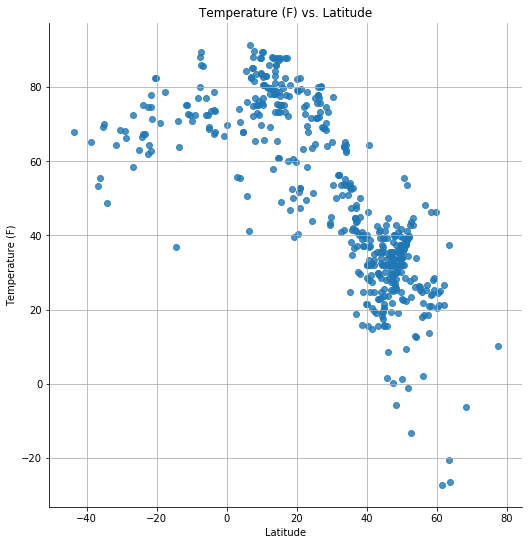

In [7]:
# temperature (F) vs. Latitude
# plt.scatter(randomcitiesDF["Latitude"], randomcitiesDF["Temperature"], marker = "o")
sns.lmplot(x = 'Latitude', y = 'Temperature', data = randomcitiesDF, fit_reg= False, size = 7.5)
plt.title("Temperature (F) vs. Latitude")
plt.ylabel("Temperature (F)")
plt.grid()
plt.savefig("temp_v_lat.png")


plt.show()

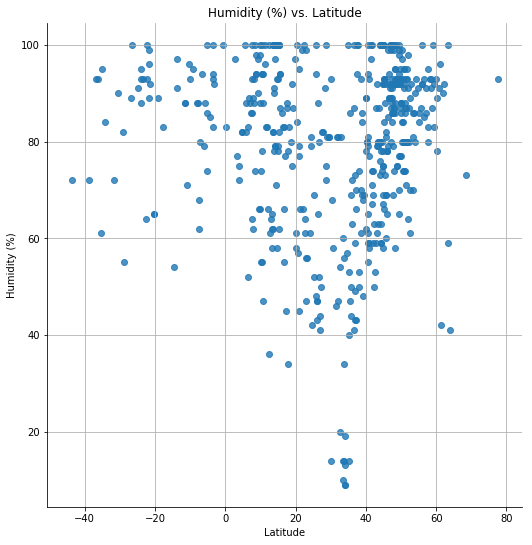

In [8]:
# humidity (%) vs. Latitude
sns.lmplot(x = 'Latitude', y = 'Humidity', data = randomcitiesDF, fit_reg= False, size = 7.5)
plt.title("Humidity (%) vs. Latitude")
plt.ylabel("Humidity (%)")
plt.grid()
plt.savefig("humidity_v_lat.png")

plt.show()

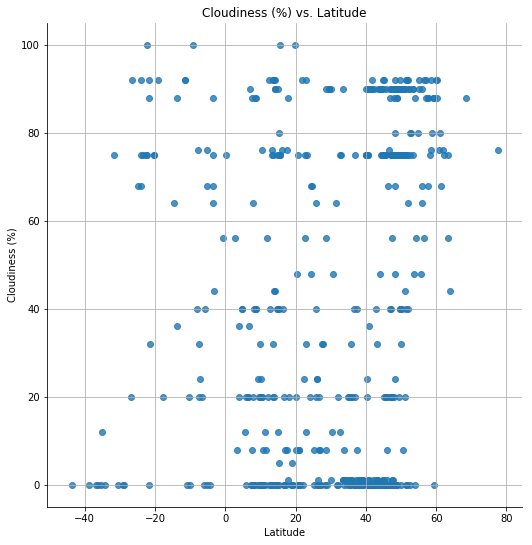

In [9]:
# cloudiness (%) vs Latitude

sns.lmplot(x = 'Latitude', y = 'Cloudiness', data = randomcitiesDF, fit_reg= False, size = 7.5)
plt.title("Cloudiness (%) vs. Latitude")
plt.ylabel("Cloudiness (%)")
plt.grid()
plt.savefig("cloudiness_v_lat.png")


plt.show()

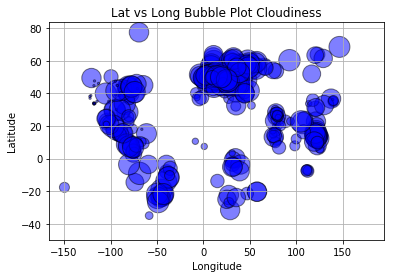

In [13]:
# Latitdue vs Longitdue Bubble Plot with Cloudiness
cloudinessPlot = plt.scatter(x = randomcitiesDF["Longitude"], y = randomcitiesDF["Latitude"], s = randomcitiesDF["Cloudiness"]*5, color = "blue", alpha = 0.5, edgecolor = "black", label = "Cloudiness", )
plt.title("Lat vs Long Bubble Plot Cloudiness")
plt.ylabel("Latitude")
plt.xlabel("Longitude")
plt.Figure = [7,7]
plt.grid()
plt.savefig("cloudiness_bubble.png")


plt.show()

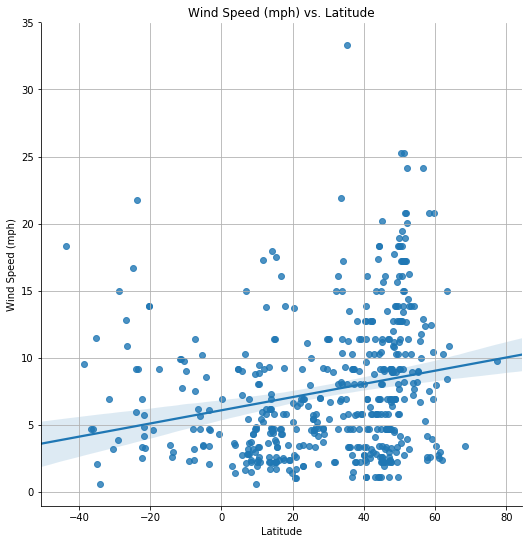

In [11]:
# wind speed (mph) vs Latitude
sns.lmplot(x = 'Latitude', y = 'Wind Speed', data = randomcitiesDF, fit_reg= True, size = 7.5)
plt.title("Wind Speed (mph) vs. Latitude")
plt.ylabel("Wind Speed (mph)")
plt.grid()
plt.savefig("wind_v_lat.png")


plt.show()

### Observable Trends
* The closer to 0 latitude the higher the temperature. Per the Temp vs Lat graph, we can see a clear trend that anything from -20 to 20 lat is above 60F. What's interesting is that when you hit 40 latitude or greater the temperature dips below to 40 degrees or lower but at -40 latitude it is still in the 60+ range.


* Humidity is at it's highest point of 80 - 100% at 0 to 20 latitude and 40 to 60 latitude.


* For the cloudiness vs latitude, there are clumps of 0% and 100% but no clear correlation to the latitude. I decided to create a bubble plot for lat vs longitde with the cloudiness being the size. From here there is a clearer correlation of cloudiness size and % with a large cluster of cloudiness from 0 to 50 longitude and 40 to 60 latitude. This trend can also be seen at -50 to -100 longitude.


* For Wind Speed, we can see that the higher the Latitude, the wind speed tends to pick up to a greater speed. There is an upward trend for wind speed as the Latitude is greater.